In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

# PATH = './2000samples_0-0.1platforms/'
# files = os.listdir(PATH)
# files = [i for i in files if i[-4:] == '.csv']
PATH = './period_samples/'
files = ['50each_per_year/all.csv', '500each_per_year/all.csv', '5000each_per_year(if not 5000 its max of it)/all.csv']
files

graph_names = ['top50', 'top500', 'top5000']
# platform_dict = {0:'Go', 0.0125:'NPM', 0.025:'Packagist', 0.0375:'Rubygems', 0.05:'Pypi', 0.0625:'Maven', 0.075:'Bower', 0.0875:'NuGet', 0.1: 'CocoaPods'}
platform_dict = {0:'Go', 0.16666666666666666:'NPM', 0.3333333333333333:'Packagist', 0.5:'Rubygems', 0.6666666666666666:'Pypi', 0.8333333333333334:'Bower', 1:'Maven'}
colors = ['#000000', '#00fc54', '#fc0400', '#9300fc', '#00cefc', '#fc6500', '#fce700']

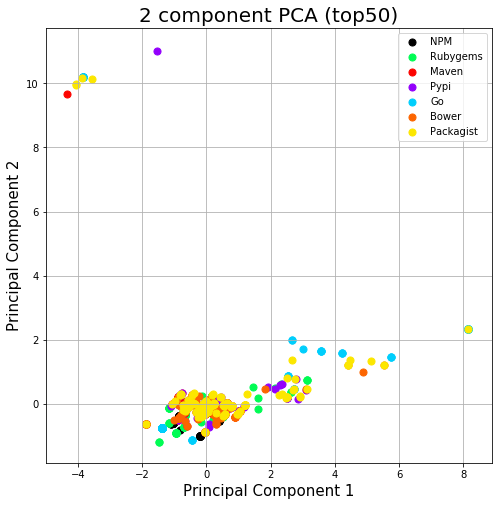

variance for component1: 0.19058200255921548,
variance for component2: 0.16148877649612875,
total_variance: 0.35207077905534423


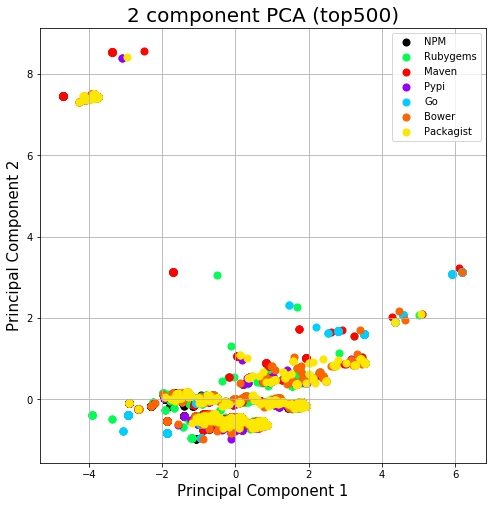

variance for component1: 0.24289223941767513,
variance for component2: 0.15902098155312464,
total_variance: 0.40191322097079973


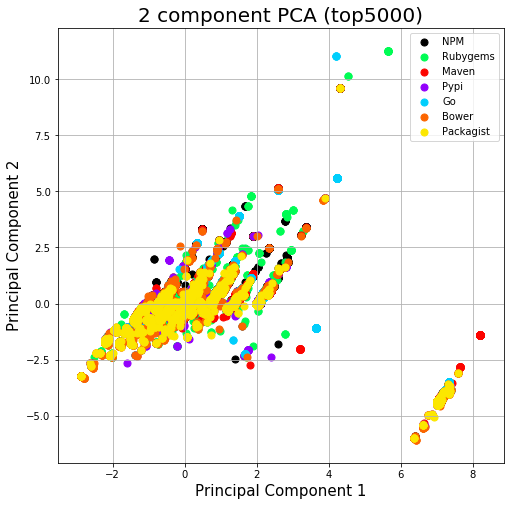

variance for component1: 0.2211598865477823,
variance for component2: 0.15206381137742486,
total_variance: 0.37322369792520715


In [4]:
for file, name in zip(files, graph_names) :
    df = pd.read_csv(PATH+file, index_col=False)
    df = df.replace({'Platform':platform_dict})
    features = list(df) 
    features.remove('Platform')
    x = df.loc[:, features].values
    y = df.loc[:,['Platform']].values
    x = StandardScaler().fit_transform(x)
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
    finalDf = pd.concat([principalDf, df[['Platform']]], axis = 1)
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title(f'2 component PCA ({name})', fontsize = 20)
    targets = list(set(list(df['Platform'])))
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['Platform'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                   , finalDf.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()
    plt.show()
    plt.savefig('pca_'+name+'.png')
    variance = pca.explained_variance_ratio_
    var_com1 = variance[0]
    var_com2 = variance[1]
    total = var_com1 + var_com2
    print(f'variance for component1: {var_com1},\nvariance for component2: {var_com2},\ntotal_variance: {total}')